In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import Image

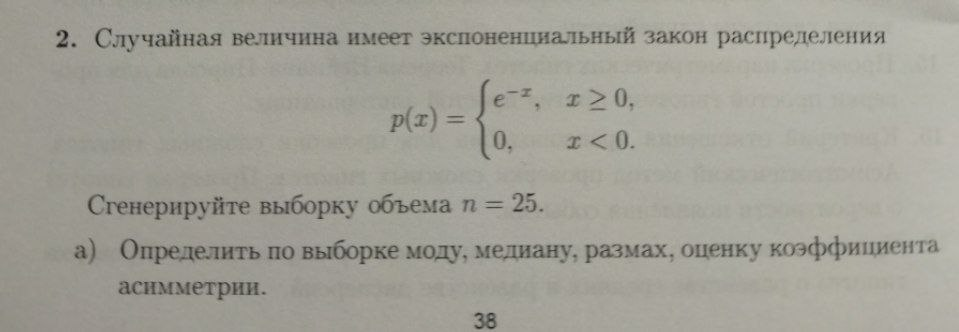

In [26]:
Image("images/task_2_1.jpg")

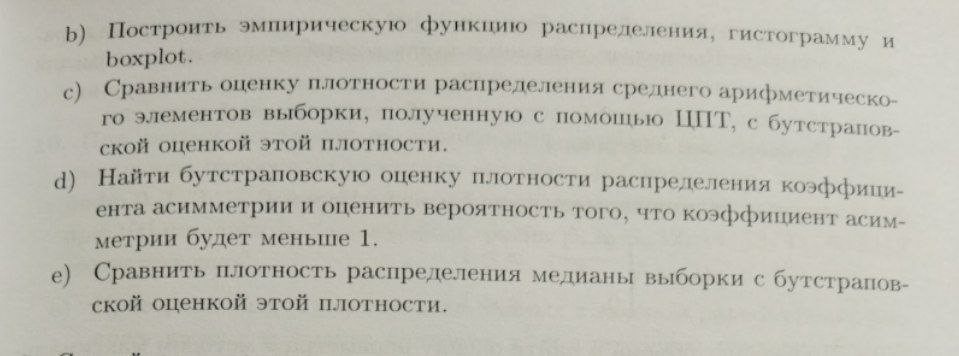

In [27]:
Image("images/task_2_2.jpg")

***Задаем размер выборки***

In [28]:
n = 25

In [29]:
def p(x):
    if x < 0:
        return 0
    else:
        return np.exp(-x)
    
def F(x):
    if x < 0:
        return 0
    else:
        return (1 - np.exp(-x))
    
def F_reversed(y):
    if y < 0:
        return 0
    else:
        return -np.log(1 - y)

sample = [ F_reversed(random.random()) for _ in range(n) ]


***a)***

In [30]:
variation_series = sorted(sample)

#Моды
modes = []
met_numbers = [variation_series.count(x) for x in variation_series]
modas_met_number = max(met_numbers)
for i in range(n):
    if met_numbers[i] == modas_met_number:
        modes.append(variation_series[i])

#Медиана
mediana = np.median(variation_series)

#Размах
scope = variation_series[-1] - variation_series[0]

# оценка к-го центрального момента
def M_k(variation_series, k):
    return np.sum( (variation_series - variation_series.mean())**k ) / variation_series.size

#Оценка коэффициента ассиметрии
variation_series = np.array(variation_series)
asymmetry_coeff = M_k(variation_series, 3) / (M_k(variation_series, 2) ** 1.5)

print(f"Моды: {modes} \nМедиана: {mediana} \nРазмах: {scope} \nОценка коэффициента ассиметрии: {asymmetry_coeff}")

Моды: [0.02409914889175944, 0.02459961750690702, 0.04123940067721169, 0.07282359385239198, 0.07687002557344279, 0.11786075394863714, 0.16580898919281417, 0.2092681947279615, 0.22553893410974912, 0.26590744306191666, 0.3054562779010515, 0.3099282645118902, 0.3406588250622166, 0.5879323690592245, 0.6604310605628427, 0.8732005734059757, 1.51259223203856, 1.5792948259557111, 1.8823774001315172, 1.9268799568973949, 2.0529506302099954, 2.774060671573113, 2.8232093595795122, 3.070040030775422, 8.595544477797045] 
Медиана: 0.3406588250622166 
Размах: 8.571445328905286 
Оценка коэффициента ассиметрии: 2.7957689960531282


***b)***

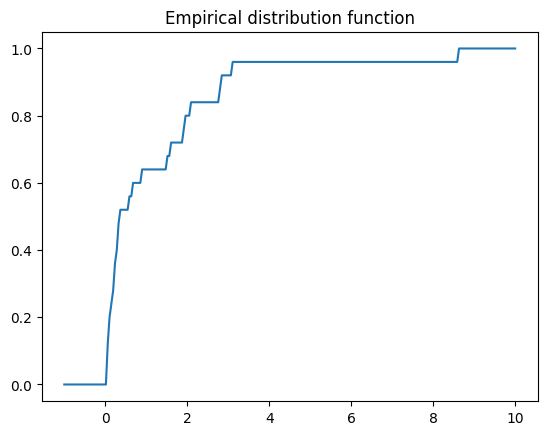

In [31]:
X = np.linspace(-1, 10, n*10)
Y_distribution = ( variation_series.reshape(-1, 1) < X.reshape(1, -1) ).mean(0)
plt.plot(X, Y_distribution)
plt.title("Empirical distribution function")
plt.show()

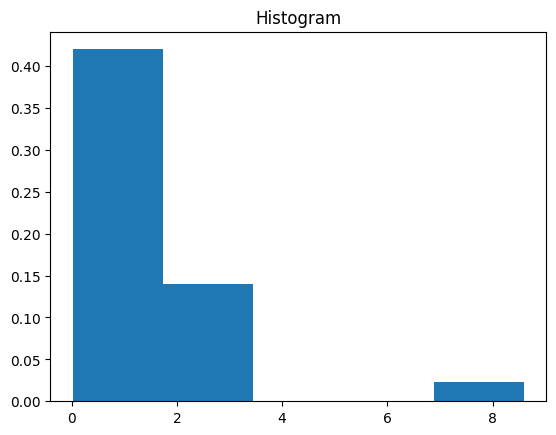

In [32]:
plt.hist(variation_series, int(1+np.log2(n)), density=True)
plt.title("Histogram")
plt.show()

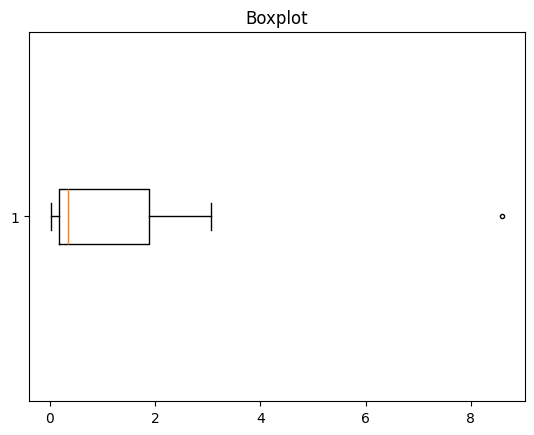

In [33]:
plt.boxplot(variation_series, vert=False, sym='.')
plt.title("Boxplot")
plt.show()

***c)***

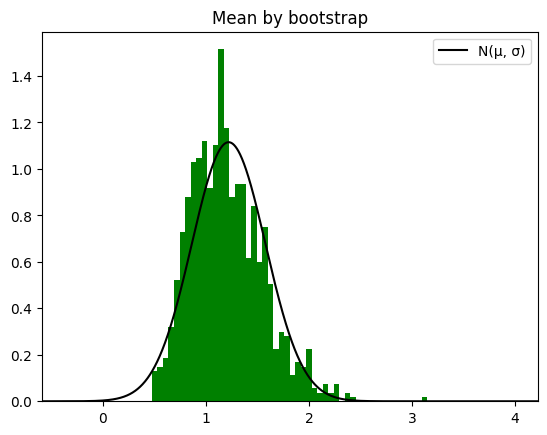

In [38]:
from scipy.stats import norm

bootstrap_size = 1000
bootstrap_samples_mean = [ np.mean(np.random.choice(variation_series, n, replace=True)) for _ in range(bootstrap_size) ]

mu = M_k(variation_series, 1)
sigma = M_k(variation_series, 2) ** 0.5

X = np.linspace(mu - sigma*3, mu + sigma*3, 10000)
Y = norm.pdf(X, np.mean(variation_series), sigma/(n**0.5))

plt.hist(bootstrap_samples_mean, 50, color='g', density=True)
plt.plot(X, Y, label='N(μ, σ)', color="black")
plt.title('Mean by bootstrap')

width = max(bootstrap_samples_mean) - min(bootstrap_samples_mean)

plt.xlim(min(bootstrap_samples_mean)-width*0.4, max(bootstrap_samples_mean)+width*0.4)
plt.legend()
plt.show()

***d)***

P(asymmetry_coeff < 1) ≈ 0.1318


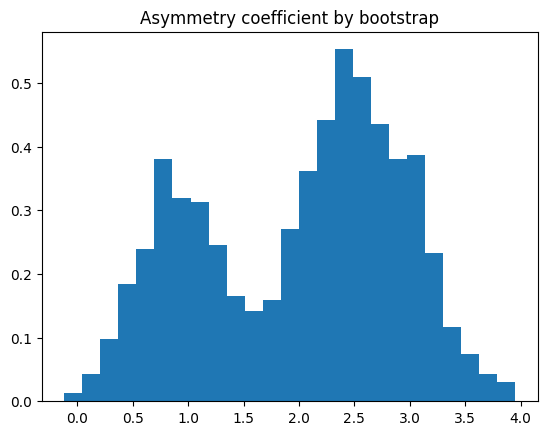

In [37]:
bootstrap_samples_asymmetry = []
for _ in range(bootstrap_size):
    boot_sample = np.array([np.random.choice(variation_series, n, replace=True)])
    bootstrap_samples_asymmetry.append( M_k(boot_sample, 3) / (M_k(boot_sample, 2)**1.5))

prob = 0.
for x in bootstrap_samples_asymmetry:
    if x < 1:
        prob += x
prob /= bootstrap_size

print(f"P(asymmetry_coeff < 1) ≈ {round(prob, 4)}")

plt.hist(bootstrap_samples_asymmetry, 25, density=True)
plt.title('Asymmetry coefficient by bootstrap')
plt.show()

***e)***

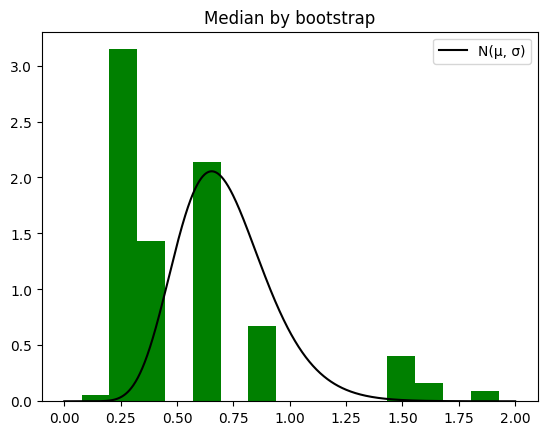

In [39]:
from math import comb

bootstrap_samples_median = [ np.median(np.random.choice(variation_series, n, replace=True)) for _ in range(bootstrap_size) ]

X = np.linspace(0, 2, bootstrap_size)
k = n // 2 + 1
Y = [ ( (1-F(x))**(n-k) ) * ( F(x)**(k-1) ) * n * p(x) * comb(n-1, k-1) for x in X ]

plt.hist(bootstrap_samples_median, 15, color='g', density=True)
plt.plot(X, Y, label='N(μ, σ)', color = 'black')
plt.title('Median by bootstrap')
plt.legend()
plt.show()